<a href="https://colab.research.google.com/github/Qianq0625/autoencoder-test/blob/main/28%20autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import torch.nn as nn
from matplotlib.pyplot import figure
from torch.autograd import Variable as V
import torch
import numpy as np
from pathlib import Path
import pandas as pd
import os
import xlwt
import random
from tensorflow.keras.models import load_model


In [ ]:
# minist show
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(X_train, _), (X_test, _) = mnist.load_data()


import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [ ]:
#@title
# 使用默认的绘图风格
plt.style.use('default')

In [ ]:
#show all file names
file_name = os.listdir(r'/content/data/')
file_name

for i in range(len(file_name)):
  file_path = r'/content/data/'+'/'+file_name[i]
  print(file_path)
  data = pd.read_csv(file_path).to_numpy()

In [ ]:
# Load dataset and generate sequences

# read dataset.csv
Filename = "ID002_filtered"
dataSet = pd.read_csv("/content/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)

In [ ]:
#@title
# Generate sequences
l_min = 2
l_interval = 4


startIdx = 0
l_Sequence = 20  # set sequence_length 
output_all_data = []
print(all_data.shape)
while (startIdx + l_Sequence < inputs):
    #for i in range(0, l_Sequence):
    sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
    output_all_data.append(np.array(sequence))
    startIdx = round(l_Sequence * (3 / 4)) + startIdx

#plot sequences
figure();
output_all_data = np.array(output_all_data)
for i in range(0,10,1):
  temp_array = output_all_data[i]
  plt.plot(temp_array)


In [ ]:
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

In [ ]:
#@title
# Load dataset and generate sequences
# read dataset.csv
Filename = "ID002_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# read dataset.csv
Filename = "ID003_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# read dataset.csv
Filename = "ID005_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# read dataset.csv
Filename = "ID006_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID007_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID008_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID009_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID010_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID011_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/
# Load dataset and generate sequences

# read dataset.csv
Filename = "ID013_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID014_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID015_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/
# Load dataset and generate sequences

# read dataset.csv
Filename = "ID016_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/
# Load dataset and generate sequences

# read dataset.csv
Filename = "ID018_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

# Load dataset and generate sequences

# read dataset.csv
Filename = "ID019_filtered"
dataSet = pd.read_csv("/content/data/" + Filename + ".csv").to_numpy()
# set axes
all = np.array(dataSet[:,[1,2,3]])
time = np.array(dataSet[:,[0]])

# scale data
t = MinMaxScaler()
figure()
plt.plot(all)
t.fit(all)
all = t.transform(all)

figure()
plt.plot(all)

# convert numpy to tensor
all_data = torch.from_numpy(all)
time_data = torch.from_numpy(time)

# number of input columns
n_inputs = all_data.shape[1]
inputs = all_data.shape[0]
print(n_inputs)
print(inputs)
time_n_inputs = time_data.shape[1]
time_inputs = time_data.shape[0]
print(time_n_inputs)
print(time_inputs)
# Generate sequences v2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

l_min = 14
l_interval = 4
l_max = 18
saveflag = True
output_all_data = []
for _startIdx in range(0, l_min, l_interval):
  for l_Sequence in range(l_min, l_max + l_interval, l_interval):
    startIdx = _startIdx 
    
    while (startIdx + l_Sequence < inputs):
      #for i in range(0, l_Sequence):
      sequence = all_data[startIdx:startIdx+l_Sequence,:]
    
      output_all_data.append(np.array(sequence))
      startIdx += round(l_Sequence * (3 / 4))


#plot sequences
#len(output_all_data)
for i in range(0,len(output_all_data),1):
  fig = plt.figure(figsize = (5,5));
  temp_array = np.array(output_all_data[i])
  axes = fig.gca()
  
  axes.set_ylim(0,1)                 
  axes.plot(temp_array,linewidth=11.5)
  axes.patch.set_facecolor("black")    # 设置 ax1 区域背景颜色               
  plt.xticks(alpha=0)
  plt.tick_params(axis='x', width=0)
  plt.yticks(alpha=0)
  plt.tick_params(axis='y', width=0)

  if saveflag:
    plt.savefig("/content/Figures/" + Filename + "_" + str(i) + ".png")


output_all_data = np.array(output_all_data)
print("The number of sequences: ", output_all_data.shape[0])
nbSeq=output_all_data.shape[0] #1443 954 2321 953 498 1436


#!rm -rf Figures/

In [ ]:
#@title
# load and resize images
import cv2
from google.colab.patches import cv2_imshow

image_w=128
image_h=128

background = [255.0,255.0,255.0]
mean = [0.406,0.406,0.456]  ## value from imageNet
std = [0.224,0.224,0.225]  ##  

image_input =[]
for i in range(0, nbSeq, 1):
  img_path = "/content/Figures/" + Filename + "_" + str(i) + ".png"
  img = cv2.imread(img_path)
  #resize
  img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])

  #normalise
  img = img.astype(np.float32)
  img = (img - 0.456 / 0.224 + 1e-8)/255.0
  

In [ ]:
#white lines
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name
# this loop is for read each image in this foder,directory_name is the foder name with images.
for filename in os.listdir(r'/content/data/6k/5671 black 3/content/Figures/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/data/6k/5671 black 3/content/Figures/" + filename
        img = cv2.imread(img_path)
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #将图片转为灰度图片来分析
        ret, thresh = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY) # 固定 阈值处理 二值化图像
        cv2_imshow(thresh)
        array_of_img.append(thresh)
        #array_of_img.append(img_rgb)
        #print(img)
        #print(array_of_img)

image_input = np.array(array_of_img)


X_train = image_input
X_test = image_input
#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
## find channel mean, std and do data normalization

#gray
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [ ]:
!tar -xvf "/content/Figures/image14-18 (4).tar" -C "/content/Figures/"


In [ ]:
!unzip -d /content/data/2w /content/Figures/2w.zip

In [ ]:
print(img.size)
print(img.shape)

388800
(360, 360, 3)


In [ ]:
print(img.size)
print(img.shape)

218700
(270, 270, 3)


In [ ]:
#color lines
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name
# this loop is for read each image in this foder,directory_name is the foder name with images.
out_file_name = 'cut'
for filename in os.listdir(r'/content/data/2w/2w black 3/content/Figures/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/data/2w/2w black 3/content/Figures/" + filename
        img = cv2.imread(img_path)
        for i in range(0,len(img),1):
          img = img[45:315,45:315]
          Img_Name = "/content/data/2wcut" + str(i)
          cv2.imwrite(Img_Name  , img)


In [ ]:
#color lines
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name
# this loop is for read each image in this foder,directory_name is the foder name with images.
for filename in os.listdir(r'/content/data/2w/2w black 3/content/Figures/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/data/2w/2w black 3/content/Figures/" + filename
        img = cv2.imread(img_path)
        img = img[45:315,45:315]
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
        img = img.astype(np.float32)
        img = img / 255.0

        #img = img
        array_of_img.append(img)
        #print(img)
        #print(array_of_img)

image_input = np.array(array_of_img)


X_train = image_input
X_test = image_input
#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
## find channel mean, std and do data normalization

#color lines
X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))  # adapt this if using `channels_first` image data format


In [ ]:
#RGB
#color lines
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name
# this loop is for read each image in this foder,directory_name is the foder name with images.
for filename in os.listdir(r'/content/data/2w/2w black 3/content/Figures/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/data/2w/2w black 3/content/Figures/" + filename
        img = cv2.imread(img_path)
        img = img[45:320,45:320] #cut white area in blackground
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
      
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
        #img_rgb = img_rgb.astype(np.float32)
        #img_rgb = img_rgb / 255.0

        #img = img
        array_of_img.append(img_rgb)
        #print(img)
        #print(array_of_img)

image_input = np.array(array_of_img)


X_train = image_input
X_test = image_input
#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
## find channel mean, std and do data normalization

#color lines
#X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
#X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))  # adapt this if using `channels_first` image data format


In [ ]:
#test pattern similar or not
#RGB
#color lines
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name
# this loop is for read each image in this foder,directory_name is the foder name with images.
for filename in os.listdir(r'/content/Pattern1/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/Pattern1/" + filename
        img = cv2.imread(img_path)
        img = img[45:320,45:320] #cut white area in blackground
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
      
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
        #img_rgb = img_rgb.astype(np.float32)
        #img_rgb = img_rgb / 255.0

        #img = img
        array_of_img.append(img_rgb)
        #print(img)
        #print(array_of_img)

image_input = np.array(array_of_img)


Pattern1_train = image_input
Pattern1_test = image_input
#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
## find channel mean, std and do data normalization

#color lines
#X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
#X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))  # adapt this if using `channels_first` image data format


ID002_filtered_4.png
ID002_filtered_3.png


In [ ]:
#@title
# load and resize images
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms


image_w=28
image_h=28

background = [255.0,255.0,255.0]
mean = [0.406,0.406,0.456]  ## value from imageNet
std = [0.224,0.224,0.225]  ##  


image_input =[]

for i in range(0, 4718, 1):
  for j in range(len(filename_list)):
    img_path = "/content/Figures/" + filename_list[j] + "_" + str(i) + ".png"
    img = cv2.imread(img_path)
    #resize
    img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
    #normalise
    img = img.astype(np.float32)
    #img.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0, hue=0)
    #img = img - 0.456 / 0.224 + 1e-8
    img = img / 255.0
    #img_mean = np.mean(img,axis=0)
    #print(img_mean)
    #print(img)
    image_input.append(img)

  #debug
  if i<10:
    cv2.imwrite("/content/checkk_"+str(i)+".png", img)
    plt.figure(figsize=(20, 4))

image_input = np.array(image_input)


X_train = image_input
X_test = image_input
#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
## find channel mean, std and do data normalization



In [ ]:
#@title
# add noise
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

noisy_train_data = noise(X_train)
noisy_test_data = noise(X_test)

# Create a copy of the data with added noise
noisy_train_data = noise(X_train)
noisy_test_data = noise(X_test)

# Display the train data and a version of it with added noise
display(X_train, noisy_train_data)

In [ ]:
#@title
# load and resize images
import cv2
from google.colab.patches import cv2_imshow

image_w=128
image_h=128

background = [255.0,255.0,255.0]
mean = [0.406,0.406,0.456]  ## value from imageNet
std = [0.224,0.224,0.225]  ##  

image_input =[]
for i in range(0, nbSeq, 1):
  img_path = "/content/Figures/" + Filename + "_" + str(i) + ".png"
  img = cv2.imread(img_path)
  #resize
  img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])

  #normalise
  #img = img.astype(np.float32)
  img = img - 0.456 / 0.224 + 1e-8
  img_mean = np.mean(img, axis=0)
  img_std = np.std(img, axis=0)
  #for j in range(3):
   #img[:,:,j] = (img[:,:,j] + background[j]) / 255.0
   #img[:,j] = (img[:,j] - img_mean[j]) / img_std[j]+ 1e-8
  #img = img - 0.456 / 0.224 + 1e-8
  #img = img.astype('float32') / 255.0 - 0.5
  #print(img.max(), img.min())
  #save
  #print(img_mean)
  #print(img_std)
  #img = (img - img_mean / img_std) / 255.0
  print(img.max(), img.min())
   #img[:,:,j] = (img[:,:,j] - img_mean[:,j]) / img_std[:,j]
  #print(img.max(img_mean), img.min(img_std))
  image_input.append(img)

  #debug
  if i<10:
    cv2.imwrite("/content/checkk_"+str(i)+".png", img)
    plt.figure(figsize=(20, 4))

image_input = np.array(image_input)

X_train = image_input
X_test = image_input
#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
## find channel mean, std and do data normalization



In [ ]:
#@title
# make image set become .tar file and download
import os, tarfile
import os
from google.colab import files

def make_targz_one_by_one(output_filename, source_dir):
  tar = tarfile.open(output_filename,"w")
  for root,dir_name,files_list in os.walk(source_dir):
    for file in files_list:
      pathfile = os.path.join(root, file)
      tar.add(pathfile)
  tar.close()
 
  files.download(output_filename)
 
 
make_targz_one_by_one('image14-18.tar', '/content/Figures')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title
# Make a network model next to CNN
# autoencoder_model
# define encoder

n_inputs=28*28*3

visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/2.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs/4.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs/4.0
encoded = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs/4.0)(encoded)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs/2.0)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 3
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
autoencoder = Model(inputs=visible, outputs=output)
# compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

#plot progress results
# plot the autoencoder
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))  # adapt this if using `channels_first` image data format


In [ ]:
# RGB nomilization
# load and resize images
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#normalise 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))  # adapt this if using `channels_first` image data format


#Pattern1_train

In [ ]:
# test pattern1
# RGB nomilization
# load and resize images
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#normalise 
Pattern3_test = Pattern3_test.astype('float32') / 255
Pattern3_test = np.reshape(Pattern3_test, (len(Pattern3_test), 28, 28, 3))  # adapt this if using `channels_first` image data format



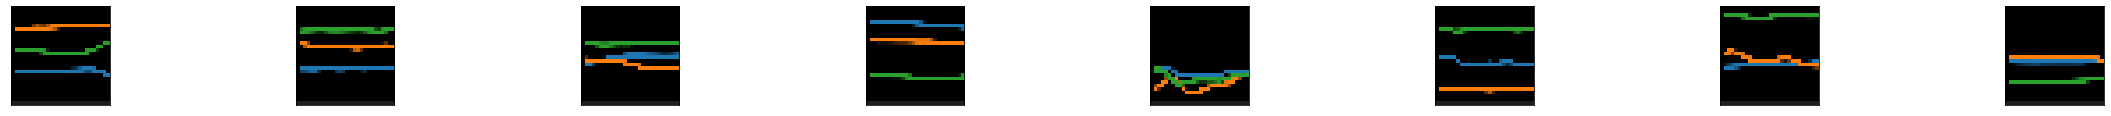

In [ ]:
n = 8
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#@title
# load and resize images
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#normalise 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = np.reshape(X_train, (len(X_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), 28, 28, 3))  # adapt this if using `channels_first` image data format

#X_train, X_test = train_test_split(image_input, test_size=0.33, random_state=1)
## find channel mean, std and do data normalization


n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:
#@title
#minist data set
# just use cnn layers

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# The encoding process
input_img = Input(shape=(28, 28, 1))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
#minst data set
# cnn + flatten
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from tensorflow.keras.utils import plot_model

# The encoding process
input_img = Input(shape=(28, 28, 1))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Flatten()(x)  #32
x = Dense(4*4*8)(x)  #32
#x = BatchNormalization()(x)
#x = ReLU()(x)
x = Dense(4*4*8/2.0)(x)  #32
x = BatchNormalization()(x)
encoded = ReLU()(x)
# bottleneck
#n_bottleneck = 2*2*8/2.0
#x = Dense(n_bottleneck)(x)
#x = BatchNormalization()(x)
#encoded = ReLU()(x) #FC

# define decoder, level 1
#x = Dense(2*2*2)(encoded)

x = Dense(4*4*8/2.0)(encoded)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(4*4*8)(x)
#x = BatchNormalization()(x)
#x = ReLU()(x)
x = Reshape((4,4,8))(x)

############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Declare the model
autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') # -loss

#autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
#gray colors
#cnn + flatten
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Softmax
from keras.models import Model
from tensorflow.keras.utils import plot_model

# The encoding process
input_img = Input(shape=(28, 28, 1))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Flatten()(x)  #32
#x = Dense(2*2*8)(x)  #32
x = Dense(2*2*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2*2*8/2.0, activation='relu')(x)
x = BatchNormalization()(x)
#x = ReLU()(x)
#x = Dense(2*2*8/2.0)(x)  #32
#x = BatchNormalization()(x)
#x = ReLU()(x)
# bottleneck
n_bottleneck = 2*2*8/4.0
encoded = Dense(n_bottleneck, activation='relu')(x) #FC
#x = BatchNormalization()(x)
#encoded = Softmax()(x)
# define decoder, level 1
#x = Dense(2*2*2)(encoded)

x = Dense(2*2*8/2.0, activation='relu')(encoded)
x = BatchNormalization()(x)
#x = ReLU()(x)
x = Dense(2*2*8, activation='relu')(x)
x = BatchNormalization()(x)
#x = ReLU()(x)
x = Reshape((2,2,8))(x)

############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

# Declare the model
autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:

# The encoding process
input_img = Input(shape=(28, 28, 3))  

############
# Encoding #
############

# Conv1-4 #
encode_layer1 = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(input_img)
encode_layer2 = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(encode_layer1)
encode_layer3 = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(encode_layer2)
encode_layer4 = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(encode_layer3)

flatten_layer = Flatten()(encode_layer4)  #32
fc_layer1 = Dense(4*4*8, activation='relu')(flatten_layer)
fc_layer1 = BatchNormalization()(fc_layer1)
fc_layer2 = Dense(4*4*8/2.0, activation='relu')(fc_layer1)
fc_layer2 = BatchNormalization()(fc_layer2)
# bottleneck
n_bottleneck = 4*4*8/2.0
encoded = Dense(n_bottleneck, activation='relu')(fc_layer2)
#clf
clf = Dense(64, activation='softmax')(encoded)

############
# Decoding #
############

de_fc_layer1 = Dense(4*4*8/2.0, activation='relu')(encoded)
de_fc_layer2 = BatchNormalization()(de_fc_layer1)
de_fc_layer3 = Dense(4*4*8, activation='relu')(de_fc_layer2)
de_fc_layer4 = BatchNormalization()(de_fc_layer3)
reshape_layer = Reshape((4,4,8))(de_fc_layer4)

# DeConv1-4
decode_layer1 = Conv2D(8, (3, 3), activation='relu', padding='same')(reshape_layer)
decode_layer1 = UpSampling2D((2, 2))(decode_layer1)
decode_layer2 = Conv2D(8, (3, 3), activation='relu', padding='same')(decode_layer1)
decode_layer2 = UpSampling2D((2, 2))(decode_layer2)
decode_layer3 = Conv2D(8, (3, 3), activation='relu')(decode_layer2)
decode_layer3 = UpSampling2D((2, 2))(decode_layer3)
decode_layer4 = Conv2D(16, (3, 3), activation='relu', padding='same')(decode_layer3)

output_img = Conv2D(3, (3, 3), activation='relu', padding='same')(decode_layer4)


# Declare the model
autoencoder = Model(input_img,output_img)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title  { form-width: "100px" }
#cnn + flatten
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Softmax
from keras.models import Model
from tensorflow.keras.utils import plot_model

# The encoding process
input_img = Input(shape=(28, 28, 3))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(input_img)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Flatten()(x)  #32
#x = Dense(2*2*8)(x)  #32
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(4*4*8/2.0, activation='relu')(x)
x = BatchNormalization()(x)
#x = ReLU()(x)
#x = Dense(2*2*8/2.0)(x)  #32
#x = BatchNormalization()(x)
#x = ReLU()(x)
# bottleneck
n_bottleneck = 4*4*8/2.0
encoded = Dense(n_bottleneck, activation='relu')(x) #FC
#x = BatchNormalization()(x)
#encoded = Softmax()(x)
# define decoder, level 1
#x = Dense(2*2*2)(encoded)

x = Dense(4*4*8/2.0, activation='relu')(encoded)
x = BatchNormalization()(x)
#x = ReLU()(x)
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
#x = ReLU()(x)
x = Reshape((4,4,8))(x)

############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#m = Conv2DTranspose(dim, 3, strides=2, activation=acti, padding='same')(m)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# Deconv3
decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)


# Declare the model
autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512 

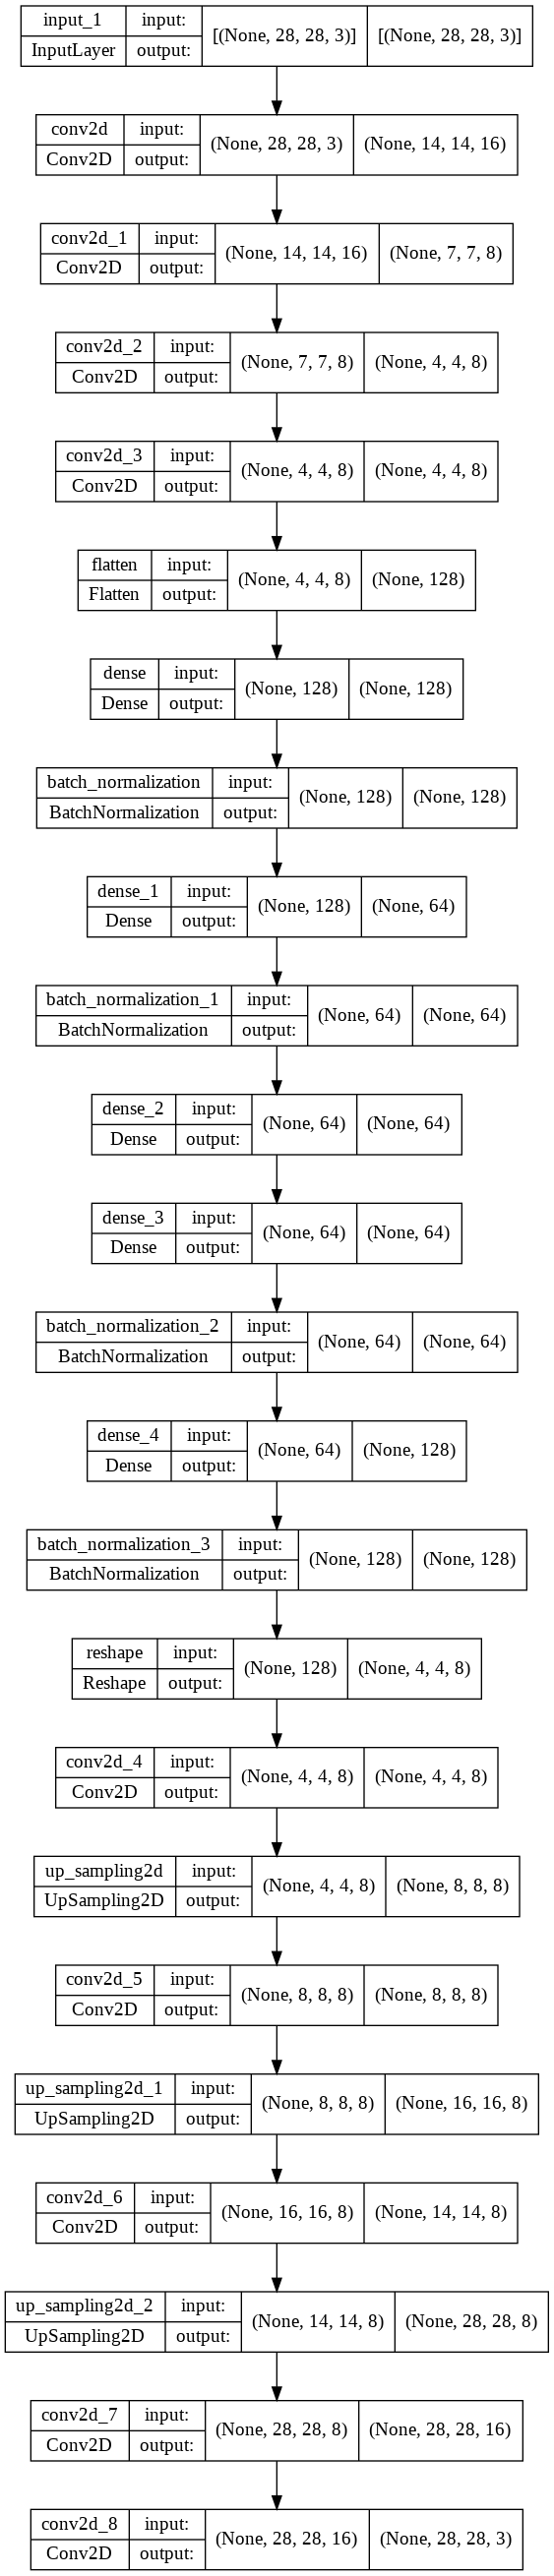

In [ ]:
#@title  { form-width: "100px" }
#cnn + flatten
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Softmax
from keras.models import Model
from tensorflow.keras.utils import plot_model

# The encoding process
input_img = Input(shape=(28, 28, 3))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(input_img)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)

x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)

x = Flatten()(x)  #32
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(4*4*8/2.0, activation='relu')(x)
x = BatchNormalization()(x)
# bottleneck
n_bottleneck = 4*4*8/2.0
encoded = Dense(n_bottleneck, activation='relu')(x)

#num_classes = 64
#clf = Dense(64, activation='softmax')(encoded)

x = Dense(4*4*8/2.0, activation='relu')(encoded)
x = BatchNormalization()(x)
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Reshape((4,4,8))(x)

############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# Deconv3
decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)


# Declare the model
autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)



In [ ]:
for i in range(len(autoencoder.layers)):
  print(autoencoder.get_layer(index=i).output) #0-23 10

In [ ]:
#encoding_clf_model = Model(input_img, clf, name="encoder_classifier")

# this model classifies images
classifier_model = Model(encoder.inputs, clf, name="image_classifier")
classifier_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
classifier_model.summary()
plot_model(classifier_model, 'classifier_model.png', show_shapes=True)
# define an encoder model (without the decoder)
history = classifier_model.fit(X_train, X_train, epochs=100, batch_size=12, shuffle=True, validation_data=(X_test,X_test))
# plot loss
score = classifier_model.evaluate(X_train, X_train, batch_size=12)
print (score)

figure(4)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


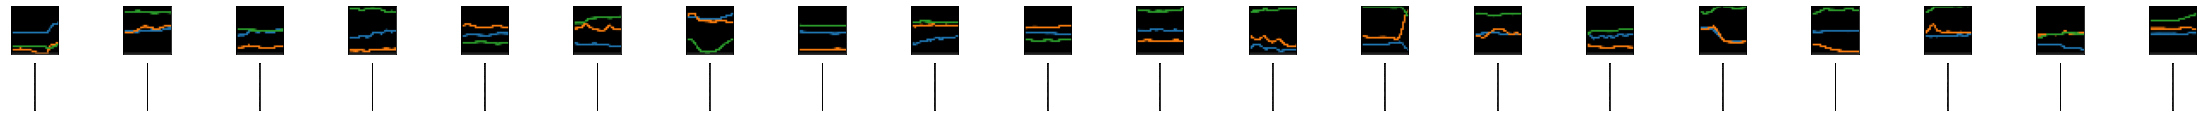

In [ ]:


# test decode results and original image
classfier = classifier_model.predict(X_test)

n = 20

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(4, n, i+1+n)
    plt.imshow(classfier[i].reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#@title  { form-width: "100px" }
#cnn + flatten
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Softmax, Conv2DTranspose
from keras.models import Model
from tensorflow.keras.utils import plot_model

# The encoding process
input_img = Input(shape=(28, 28, 3))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(input_img)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Flatten()(x)  #32
#x = Dense(2*2*8)(x)  #32
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(4*4*8/2.0, activation='relu')(x)
x = BatchNormalization()(x)
#x = ReLU()(x)
#x = Dense(2*2*8/2.0)(x)  #32
#x = BatchNormalization()(x)
#x = ReLU()(x)
# bottleneck
n_bottleneck = 4*4*8/2.0
encoded = Dense(n_bottleneck, activation='relu')(x) #FC
#x = BatchNormalization()(x)
#encoded = Softmax()(x)
# define decoder, level 1
#x = Dense(2*2*2)(encoded)

x = Dense(4*4*8/2.0, activation='relu')(encoded)
x = BatchNormalization()(x)
#x = ReLU()(x)
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
#x = ReLU()(x)
x = Reshape((4,4,8))(x)

############
# Decoding #
############

# DeConv1
x = Conv2DTranspose(8, 3, strides=2, activation='relu', padding='same')(x)

x = Conv2DTranspose(8, 3, strides=2, activation='relu', padding='same')(x)

x = Conv2DTranspose(8, 3, strides=1, activation='relu', padding='same')(x)

x = Conv2DTranspose(16, 3, strides=1, activation='relu')(x)

# Deconv3
decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)


# Declare the model
autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

In [ ]:
#@title
#minst data set

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from tensorflow.keras.utils import plot_model

# The encoding process
#input_img = Input(shape=(28, 28, 3))  
input_img = Input(shape=(28, 28, 1))
############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 


x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)

x = Flatten()(x)  #1 1 3
x = Dense(4*4*8, activation='relu')(x)
x = Dense(4*4*8/2.0)(x)
#x = BatchNormalization()(x)
#x = ReLU()(x)
#x = Dense(4*4*8/4.0)(x)
x = BatchNormalization()(x)
encoded = ReLU()(x)

# bottleneck
#n_bottleneck = 1*1*3
#encoded = Dense(n_bottleneck)(x)

# define decoder, level 1
#x = Dense(2*2*2)(encoded)
#x = Dense(4*4*8/4.0)(encoded)
#x = BatchNormalization()(x)
#x = ReLU()(x)
x = Dense(4*4*8/2.0)(encoded)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dense(4*4*8, activation='relu')(x)
x = Reshape((4,4,8))(x)

############
# Decoding #
############
# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
#decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# Declare the model
#autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
#minst data set

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from tensorflow.keras.utils import plot_model

# The encoding process
input_img = Input(shape=(28, 28, 1))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 


x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)

x = Flatten()(x)  #1 1 3
x = Dense(4*4*8, activation='relu')(x)
x = Dense(4*4*8/2.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(4*4*8/4.0)(x)
x = BatchNormalization()(x)
encoded = LeakyReLU()(x)

# bottleneck
#n_bottleneck = 1*1*3
#encoded = Dense(n_bottleneck)(x)

# define decoder, level 1
#x = Dense(2*2*2)(encoded)
x = Dense(4*4*8/4.0)(encoded)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(4*4*8/2.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(4*4*8, activation='relu')(x)
x = Reshape((4,4,8))(x)

############
# Decoding #
############
# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))

x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x) #(4,4,4)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(28, 28, 3))

x = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x) #(4,4,4)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))
#cnn
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
#l = x.Flatten() #64 64 4
flatten_layer = Flatten()  # instantiate the layer
x = flatten_layer(x)       # call it on the given tensor
x = Dense(16384, activation='relu')(x)
x = Dense(16384/20.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
print(x)
x = Dense(16384/40.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(16384/80.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
# bottleneck
n_bottleneck = 3.0
encoded = Dense(n_bottleneck)(x)

# define decoder, level 1
x = Dense(16384/80.0)(encoded)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(16384/40.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(16384/20.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(16384, activation='linear')(x)
x = Reshape((64,64,4))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()

plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))
#cnn
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', padding='same')(x)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', padding='same')(x)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
#autoencoder
x = Flatten()(x)  #64 64 4
print(x)
x = Dense(64*64*4, activation='relu')(x)
x = Dense(64*64*4/20.0)(x)
x = BatchNormalization()(x)
print(x)
x = LeakyReLU()(x)
x = Dense(64*64*4/40.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(64*64*4/80.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
# bottleneck
n_bottleneck = 3.0
encoded = Dense(n_bottleneck)(x)

# define decoder, level 1
x = Dense(64*64*4/80.0)(encoded)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(64*64*4/40.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(64*64*4/20.0)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(64*64*4, activation='relu')(x)
x = Reshape((64,64,4))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))

#cnn
x = Conv2D(filters = 4, kernel_size=(3, 3), stride='2', activation='relu', padding='same',data_format='channels_last')(input_img)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

x = Conv2D(4, (3, 3), activation='relu', stride='2', padding='same',data_format='channels_last')(encoded)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same',data_format='channels_last')(x)
# define autoencoder with encoder and decoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
# plot the autoencoder strcture
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))

#cnn
x = Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same',data_format='channels_last')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same',data_format='channels_last')(x)
# define autoencoder with encoder and decoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
# plot the autoencoder strcture
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))

#cnn
x = Conv2D(filters = 256, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
l = Flatten()(x)  #64 64 4
print(l)
e = Dense(64*64*3, activation='relu')(l)
e = Dense(64*64*3/20.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
e = Dense(64*64*3/40.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
e = Dense(64*64*3/80.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 3.0
encoded = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(64*64*3/80.0)(encoded)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
d = Dense(64*64*3/40.0)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
d = Dense(64*64*3/20.0)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
d = Dense(64*64*3, activation='relu')(d)
d = Reshape((64,64,3))(d)
x = Conv2D(128, (3, 3), activation='relu', padding='same',data_format='channels_last')(d)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same',data_format='channels_last')(x)
# define autoencoder with encoder and decoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
# plot the autoencoder strcture
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))

#cnn
x = Conv2D(filters = 4, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 4, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 3, kernel_size=(3, 3), activation='relu', padding='same',data_format='channels_last')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Flatten()(x)  #2 2 3
print(x)
# bottleneck
n_bottleneck = 16*16*3
encoded = Dense(n_bottleneck)(x)

# define decoder, level 1
x = Dense(16*16*3)(encoded)
x = Reshape((16,16,3))(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.summary()
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# CNN Autoencoder
# The encoding process
input_img = Input(shape=(128, 128, 3))

#cnn
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='LeakyReLU', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='LeakyReLU', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 4, kernel_size = (3, 3), activation='LeakyReLU', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.   
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
#autoencoder
l = Flatten()(x)  
e = Dense(64*64*4/20.0)(l)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
e = Dense(64*64*4/40.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
e = Dense(64*64*4/80.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 3.0
encoded = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(64*64*4/80.0)(encoded)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
d = Dense(64*64*4/40.0)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
d = Dense(64*64*4/20.0)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
de = Dense(64*64*4, activation='linear')(d)
x = Reshape((64,64,4))(de)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# define autoencoder with encoder and decoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

# plot the autoencoder strcture
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# train nosiy model and save it
# fit the autoencoder model to reconstruct input
#x_train = X_train.reshape((len(X_train), 2352))
#x_test = X_test.reshape((len(X_test), 2352))

history = autoencoder.fit(noisy_train_data, X_train, epochs=128, batch_size=12, shuffle=True, validation_data=(noisy_test_data, X_test))
# plot loss

figure(4)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=input_img, outputs=encoded)
# plot the encoder strcture
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:

#@title
# load and resize images
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms
img1 = []
img2 = []
n =5 
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    #plt.imshow(X_test[i].reshape(28,28))
    a = plt.imshow((X_test[i]* 255 ).astype(np.float32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(4, n, i+1+n)
    b = plt.imshow((decoded_imgs[i]* 255).astype(np.float32))
    #plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print(a)
    print(b)
    img = a - b
    print(img)
    #img_error.append(img)

from PIL import Image
image = Image.open('/content/data/2w/2w black 3/content/Figures/ID002_filtered_0.png')
print(image)#查看mode是否等于RGB,
image_rgb = image.convert("RGBA")
image_rgb.getcolors()  




In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 1 10:43:29 2018
@author: Administrator
"""
import os
import cv2
import numpy as np
 
path = '/content/data/2w/2w black 3/content/Figures/'
def compute(path):
  file_names = os.listdir(path)
  per_image_Rmean = []
  per_image_Gmean = []
  per_image_Bmean = []
  for file_name in file_names:
    img = cv2.imread(os.path.join(path, file_name), 1)
    per_image_Bmean.append(np.sum(img[:,:,0]))
    per_image_Gmean.append(np.sum(img[:,:,1]))
    per_image_Rmean.append(np.sum(img[:,:,2]))
  R_sum = np.sum(per_image_Rmean)
  G_sum = np.sum(per_image_Gmean)
  B_sum = np.sum(per_image_Bmean)
  return R_sum, G_sum, B_sum
 
if __name__ == '__main__':
  R, G, B= compute(path)
  print(R, G ,B)

265211882518 269249549201 259578759477


Epoch 1/100
1515/1515 [==============================] - 32s 20ms/step - loss: 0.0242 - val_loss: 0.0206
Epoch 2/100
1515/1515 [==============================] - 25s 16ms/step - loss: 0.0207 - val_loss: 0.0193
Epoch 3/100
1515/1515 [==============================] - 25s 17ms/step - loss: 0.0197 - val_loss: 0.0185
Epoch 4/100
1515/1515 [==============================] - 30s 20ms/step - loss: 0.0190 - val_loss: 0.0180
Epoch 5/100
1515/1515 [==============================] - 25s 17ms/step - loss: 0.0183 - val_loss: 0.0168
Epoch 6/100
1515/1515 [==============================] - 25s 17ms/step - loss: 0.0172 - val_loss: 0.0153
Epoch 7/100
1515/1515 [==============================] - 25s 16ms/step - loss: 0.0162 - val_loss: 0.0142
Epoch 8/100
1515/1515 [==============================] - 29s 19ms/step - loss: 0.0155 - val_loss: 0.0138
Epoch 9/100
1515/1515 [==============================] - 26s 17ms/step - loss: 0.0149 - val_loss: 0.0134
Epoch 10/100
1515/1515 [==============================]

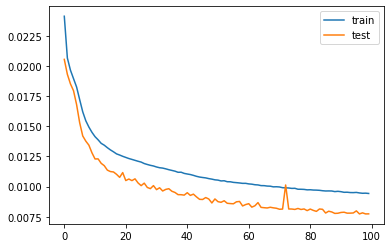

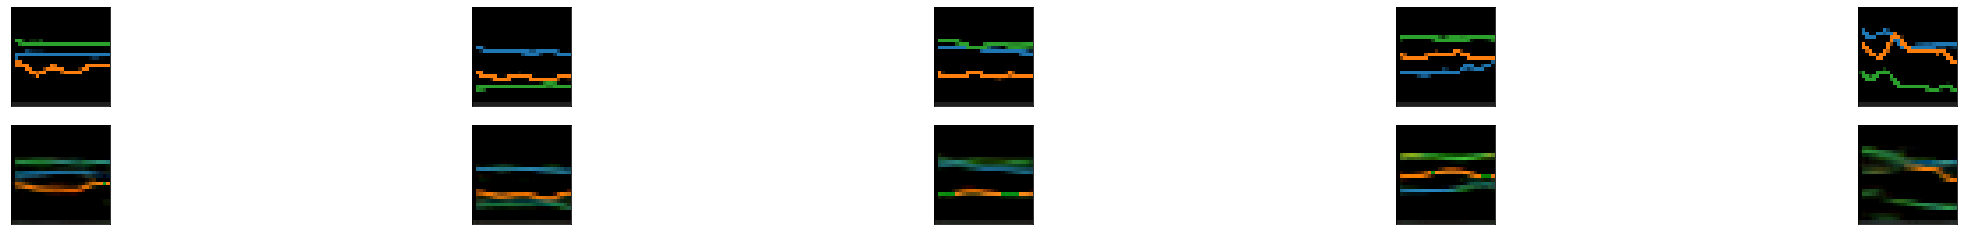

[129.42352]
[122.036514]
[-7.3870087]
mean: -7.3870087
max: -7.3870087
min: -7.3870087
std: 0.0
median: -7.3870087
[129.42352, 131.53726]
[122.036514, 122.530045]
[-7.3870087, -9.007217]
mean: -8.197113
max: -7.3870087
min: -9.007217
std: 0.81010437
median: -8.197113
[129.42352, 131.53726, 131.32942]
[122.036514, 122.530045, 130.58107]
[-7.3870087, -9.007217, -0.74835205]
mean: -5.714193
max: -0.74835205
min: -9.007217
std: 3.5731356
median: -7.3870087
[129.42352, 131.53726, 131.32942, 130.47844]
[122.036514, 122.530045, 130.58107, 134.6004]
[-7.3870087, -9.007217, -0.74835205, 4.1219635]
mean: -3.2551537
max: 4.1219635
min: -9.007217
std: 5.2646074
median: -4.0676804
[129.42352, 131.53726, 131.32942, 130.47844, 132.3255]
[122.036514, 122.530045, 130.58107, 134.6004, 130.27925]
[-7.3870087, -9.007217, -0.74835205, 4.1219635, -2.0462494]
mean: -3.013373
max: 4.1219635
min: -9.007217
std: 4.733572
median: -2.0462494
[129.42352, 131.53726, 131.32942, 130.47844, 132.3255, 111.478424]
[122.

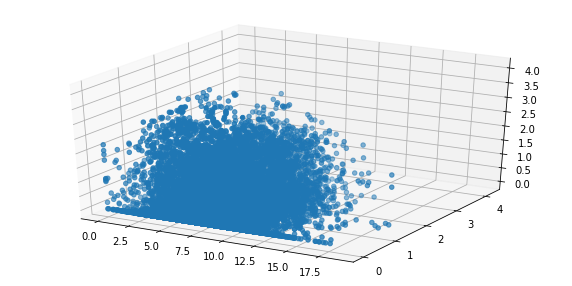

In [ ]:
# train model and save it
# fit the autoencoder model to reconstruct input
#x_train = X_train.reshape((len(X_train), 2352))
#x_test = X_test.reshape((len(X_test), 2352))
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=12, shuffle=True, validation_data=(X_test,X_test))
# plot loss
score = autoencoder.evaluate(X_train, X_train, batch_size=12)
print (score)

figure(4)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=input_img, outputs=encoded)
# plot the encoder strcture
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

# define an encoder model (without the decoder)
decoder = Model(inputs=encoded, outputs=decoded)
# plot the encoder strcture
plot_model(decoder, 'decoder_no_compress.png', show_shapes=True)
# save the encoder to file
decoder.save('decoder.h5')

# define an encoder model (without the decoder)
#clf_img = Model(inputs=encoder.inputs, outputs=clf)
# plot the encoder strcture
#plot_model(clf_img, 'clf_no_compress.png', show_shapes=True)
# save the encoder to file
#clf_img.save('clf.h5')

# test decode results and original image
decoded_imgs = autoencoder.predict(X_test)
#clf_imgs = clf_img.predict(X_test)


n = 5

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i +1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((X_test[i+10]* 255 ).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow((decoded_imgs[i+10]* 255).astype(np.uint8))
    #plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    #ax = plt.subplot(4, n, i+1+n+n)
    #plt.imshow(clf_imgs[i].reshape(64,1))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

plt.show()


import os
import cv2
import numpy as np

n = 10
img_orig_rgb = []
img_re_rgb = []
img_diff_rgb = []
#len(X_test)
for i in range(0,10,1):
    R = np.sum(X_test[i,:,:,0])
    G = np.sum(X_test[i,:,:,1])
    B = np.sum(X_test[i,:,:,2])
    rgb = R + G + B
    img_orig_rgb.append(rgb)
    print(img_orig_rgb)

    R = np.sum(decoded_imgs[i,:,:,0])
    G = np.sum(decoded_imgs[i,:,:,1])
    B = np.sum(decoded_imgs[i,:,:,2])
    rgb = R + G + B
    img_re_rgb.append(rgb)
    print(img_re_rgb)

    img_diff = img_re_rgb[i] - img_orig_rgb[i]
    img_diff_rgb.append(img_diff)
    print(img_diff_rgb)

    diff_rgb_mean = np.mean(img_diff_rgb)
    diff_rgb_max = np.max(img_diff_rgb)  #最大值
    diff_rgb_min = np.min(img_diff_rgb)  #最小值
    diff_rgb_std = np.std(img_diff_rgb)  #标准差
    diff_rgb_median = np.median(img_diff_rgb) #中位数
    print("mean:",diff_rgb_mean)
    print("max:",diff_rgb_max)
    print("min:",diff_rgb_min)
    print("std:",diff_rgb_std)
    print("median:",diff_rgb_median)

# Plot clustering results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

result = encoder.predict(X_test)
#result1 = np.transpose(result)
#print(result1.size)
len_mlist = result.shape[0]+1
mlist = list(range(1,len_mlist))
mlist1 = np.array(mlist)

x = []
y = []
z = []
x = result[:,0]
y = result[:,1]
z = result[:,2]
#gender_labels = np.random.choice([0, 1], 35)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
#ax.scatter(x,y,z,c=mlist,cmap=plt.cm.Blues,edgecolor='none',s=20)
#ax1.plot(x1,y1,z1)

plt.show()
#for i in range(len(y)):

    #plt.text(x[i]*1.01, y[i]*1.01, z[i]*1.01, s = '%d' % (int(i)), fontsize=10, fontstretch = 'condensed', color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=15)
#plt.savefig('result.png')
#plt.show()



In [ ]:
#compute tp, tp_and_fn and tp_and_fp w.r.t all classes
tp_and_fn = cm.sum(1)
tp_and_fp = cm.sum(0)
tp = cm.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

In [ ]:

clf_img.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 
clf_img.summary


clf_img.fit(X_train, clf_imgs,
      epochs=50,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, clf_imgs))

#print encoded1 weights again 
weight = autoencoder.layers[1].getwights()
weights = clf_img.layers[1].get_weights() # list of numpy arrays
print(weights)
print(weight)


scores = clf_img.evaluate(X_test, clf_imgs, verbose=1) 
print("Accuracy: ", scores[1])

In [ ]:
#clf_imgs
n = 10

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    #plt.imshow((decoded_imgs[i]* 255).astype(np.uint8))
    plt.imshow(clf[i].reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



[ 7.552292    0.92909276  5.564662    0.          0.          0.9160678
  1.0019152   0.          0.          0.98823977  4.568473    1.2120192
  0.          0.          4.8394485   2.9486012   6.0372562   7.5678945
  6.2070584   3.5135603   7.3610487  11.501286    3.217277    8.606231
  1.9939604   5.483104    0.          4.124674    0.          3.1945863
  4.8528857   5.9058433   0.          3.1652465   5.7197475   0.
  7.1810894   4.2465644   8.493985    7.350154    8.752858    9.489862
  0.          1.1364393   6.8682613   7.880878    4.441313    6.2606196
  8.634225    5.4550962   0.          4.552848    4.8103957   0.
  7.915027    4.349368    1.588003    3.340567    1.4477975   0.
  4.436084   13.113842    0.          0.        ]
[ 8.210087   2.2527373  4.847886   0.         0.         1.270648
  1.0823174  0.         0.         1.7423655  4.012581   0.7874472
  0.         0.         5.0836506  3.4276187  7.168235   5.6822367
  5.107964   3.5317395  5.7672973 10.365972   4.25435

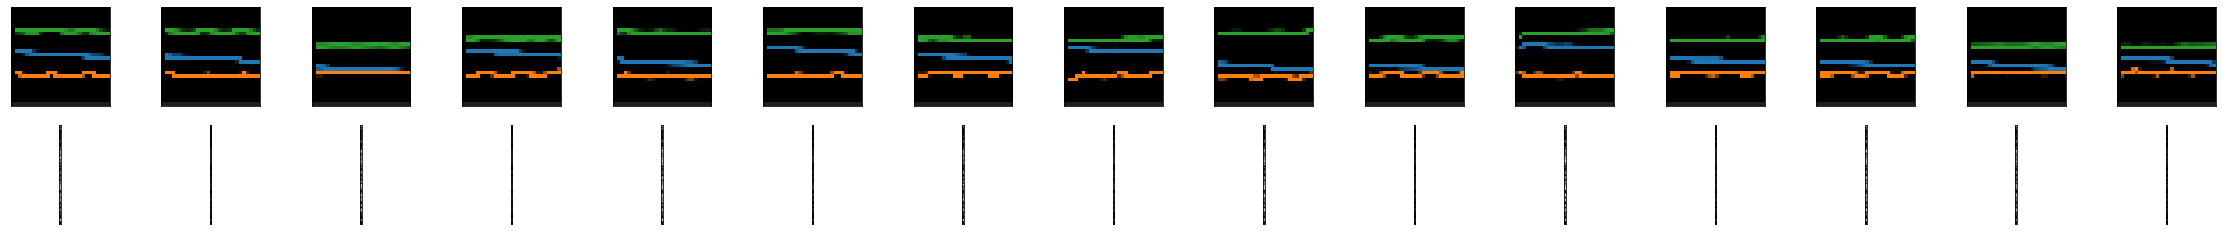

[250.71776]
mean: 250.71776
difference: [0.0]
[250.71776, 241.80014]
mean: 246.25894
difference: [0.0, -4.4588013]
[250.71776, 241.80014, 232.4064]
mean: 241.64143
difference: [0.0, -4.4588013, -9.235031]
[250.71776, 241.80014, 232.4064, 219.43373]
mean: 236.08951
difference: [0.0, -4.4588013, -9.235031, -16.655777]
[250.71776, 241.80014, 232.4064, 219.43373, 242.53787]
mean: 237.37918
difference: [0.0, -4.4588013, -9.235031, -16.655777, 5.1586914]
[250.71776, 241.80014, 232.4064, 219.43373, 242.53787, 257.91394]
mean: 240.80164
difference: [0.0, -4.4588013, -9.235031, -16.655777, 5.1586914, 17.112305]
[250.71776, 241.80014, 232.4064, 219.43373, 242.53787, 257.91394, 220.72481]
mean: 237.93352
difference: [0.0, -4.4588013, -9.235031, -16.655777, 5.1586914, 17.112305, -17.20871]
[250.71776, 241.80014, 232.4064, 219.43373, 242.53787, 257.91394, 220.72481, 239.737]
mean: 238.15895
difference: [0.0, -4.4588013, -9.235031, -16.655777, 5.1586914, 17.112305, -17.20871, 1.5780487]
[250.71776, 

In [ ]:
#test pattern1

Pattern1_result = encoder.predict(Pattern1_test)
#result1 = np.transpose(result)
#print(result1.size)

# show result = encoder.predit()
n = len(Pattern1_result)

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow((Pattern1_test[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((Pattern1_result[i]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print(Pattern1_result[i])


plt.show()

img_R = []
img_diff = []
for i in range(0,n,1):
    R641 = np.sum(Pattern1_result[i,:])
    img_R.append(R641)
    print(img_R)
    diff_mean = np.mean(img_R)

    print("mean:",diff_mean)
    diff = img_R[i] - diff_mean
    img_diff.append(diff)
    print("difference:",img_diff)



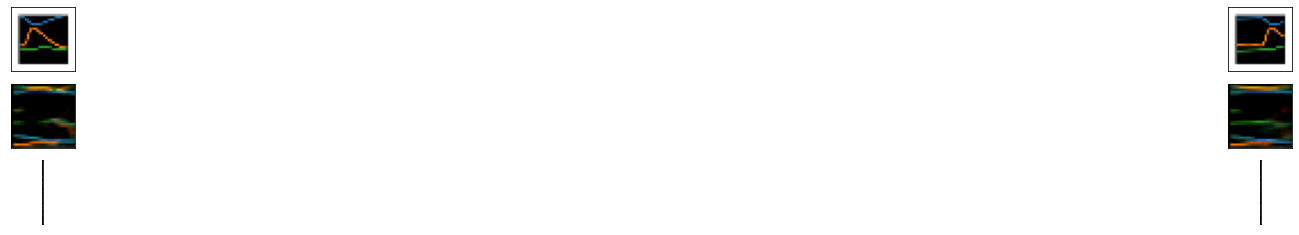

In [ ]:
#test pattern1

Pattern3_result = encoder.predict(Pattern3_test)
decoded_imgs = autoencoder.predict(Pattern3_test)
#result1 = np.transpose(result)
#print(result1.size)

# show result = encoder.predit()
n = 2

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow((Pattern3_test[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow((decoded_imgs[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i+n+n+1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((Pattern3_result[i]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #print(Pattern1_result[i])

plt.show()


n = 10
img_orig_rgb = []
img_re_rgb = []
img_diff_rgb = []
#len(X_test)

n = 10
img_orig_rgb = []
img_re_rgb = []
img_diff_rgb = []
#len(X_test)

for i in range(0,len(Pattern1_test),1):
    R = np.sum(Pattern1_test[i,:,:,0])
    G = np.sum(Pattern1_test[i,:,:,1])
    B = np.sum(Pattern1_test[i,:,:,2])
    rgb = R + G + B
    img_orig_rgb.append(rgb)
    print(img_orig_rgb)

    R = np.sum(decoded_imgs[i,:,:,0])
    G = np.sum(decoded_imgs[i,:,:,1])
    B = np.sum(decoded_imgs[i,:,:,2])
    rgb = R + G + B
    img_re_rgb.append(rgb)
    print(img_re_rgb)

    img_diff = img_re_rgb[i] - img_orig_rgb[i]
    img_diff_rgb.append(img_diff)
    print(img_diff_rgb)

    diff_rgb_mean = np.mean(img_diff_rgb)
    diff_rgb_max = np.max(img_diff_rgb)  #最大值
    diff_rgb_min = np.min(img_diff_rgb)  #最小值
    diff_rgb_std = np.std(img_diff_rgb)  #标准差
    diff_rgb_median = np.median(img_diff_rgb) #中位数
    print("mean:",diff_rgb_mean)
    print("max:",diff_rgb_max)
    print("min:",diff_rgb_min)
    print("std:",diff_rgb_std)
    print("median:",diff_rgb_median)

img_R = []
for i in range(0,len(Pattern1_result),1):
    R64 = np.sum(Pattern1_result[i,:])
    img_R.append(R64)
    print(img_R)


    diff_rgb_mean = np.mean(img_R)
    diff_rgb_max = np.max(img_R)  #最大值
    diff_rgb_min = np.min(img_R)  #最小值
    diff_rgb_std = np.std(img_R)  #标准差
    diff_rgb_median = np.median(img_R) #中位数
    print("mean:",diff_rgb_mean)
    print("max:",diff_rgb_max)
    print("min:",diff_rgb_min)
    print("std:",diff_rgb_std)
    print("median:",diff_rgb_median)


In [ ]:
# show result = encoder.predit()
n = 8
test_result =[]
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, 1)
    plt.imshow((X_test[1]* 255 ).astype(np.uint8))
    test_result.append(ax)
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(1, n, 2)
    #plt.imshow(X_test[i].reshape(28,28))
    test_result.append(ax)
    plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(1, n, 3)
    plt.imshow((X_test[2]* 255 ).astype(np.uint8))
    test_result.append(ax)
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(1, n, 4)
    #plt.imshow(X_test[i].reshape(28,28))
    test_result.append(ax)
    plt.imshow((result[2]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(1, n, 5)
    plt.imshow((X_test[3]* 255 ).astype(np.uint8))
    test_result.append(ax)
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(1, n, 6)
    #plt.imshow(X_test[i].reshape(28,28))
    test_result.append(ax)
    plt.imshow((result[3]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# make 64X1 as labels 18000+samples 
def plot_images(x, y=None):
    """Plot all images in x, with optional labels given by y.

    Expect x.shape == (n, h, w), where n = number images, h = image height, w = image width
    """
    plt.figure(figsize=(20, 4))
    n = x.shape[0]
    for i in range(n):
        image = x[i]
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x[i])
        plt.gray()
        if y is not None:
            label = y[i]
            plt.title(label)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
plot_images(X_test[:10], clf[:10])

In [ ]:

mlist = list(range(1,65))
mlist1 = np.array(mlist)

In [ ]:
# Change the labels from categorical to one-hot encoding
from tensorflow.keras.utils import to_categorical 
from sklearn import metrics
import matplotlib.pyplot as plt
#result_train = encoder.predict(X_train) #64
#result_test = encoder.predict(X_test)
# 34  5/11

Yresult_train_one_hot = to_categorical(result)
print(Yresult_train_one_hot, file=open("test2_1.txt", "a"))

# Display the change for category label using one-hot encoding
print('Original label:', X_train.shape[0],X_train) #18179
print('After conversion to one-hot:', Yresult_train_one_hot.shape[0],Yresult_train_one_hot)

In [ ]:
from sklearn.decomposition import PCA
encoded_imgs_2D = PCA(n_components=2).fit_transform(clf_imgs)
plt.figure(figsize=(10, 10))
for label in range(64):
    encodings = encoded_imgs_2D[clf_imgs == clf_imgs, :]
    plt.scatter(encodings[:, 0], encodings[:, 1], alpha=.5, label=label)
plt.legend()

IndexError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
# import libraries
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, LeakyReLU, ReLU, BatchNormalization, UpSampling2D, Conv2D, MaxPool2D, Flatten, Reshape, Softmax
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from pathlib import Path
import pandas as pd
import os

ID002_filtered_474.png
ID002_filtered_835.png
1.0
1.0000001
[8.1161043e-06 5.9182428e-09 1.5609486e-06 9.6527815e-01 2.1182077e-12
 1.4353557e-07 7.4086232e-10 1.6631515e-09 9.9996923e-06 3.5001633e-06
 4.5127541e-10 1.0244603e-03 5.3308739e-16 5.5459095e-04 2.1021440e-05
 3.3691645e-04 8.4869232e-09 1.0928956e-09 6.7419716e-11 1.1107896e-10
 9.0875030e-11 2.5978180e-12 7.1062405e-09 2.0764886e-05 1.4247156e-03
 3.4640930e-08 1.2488141e-07 9.3113676e-11 2.1999333e-09 3.9873083e-07
 1.6551076e-07 8.8061675e-10 3.8630182e-03 1.1330859e-08 5.2938788e-07
 4.5041055e-09 4.0642355e-08 1.0305413e-09 8.9705188e-11 5.1795702e-08
 1.4537613e-10 3.1236608e-12 3.0272555e-12 2.1105756e-10 1.3044331e-11
 4.2631405e-09 3.9482577e-11 2.7451076e-02 4.8929052e-11 1.4563881e-12
 4.9931631e-10 2.7756067e-10 4.9737179e-07 2.8816117e-08 6.0267610e-11
 2.9157162e-13 5.1225174e-12 2.7084052e-10 8.6938874e-09 8.5766675e-13
 7.1155143e-10 9.1489295e-11 3.3638280e-08 2.1100464e-08]
[7.5028938e-06 2.4814381e-07 5

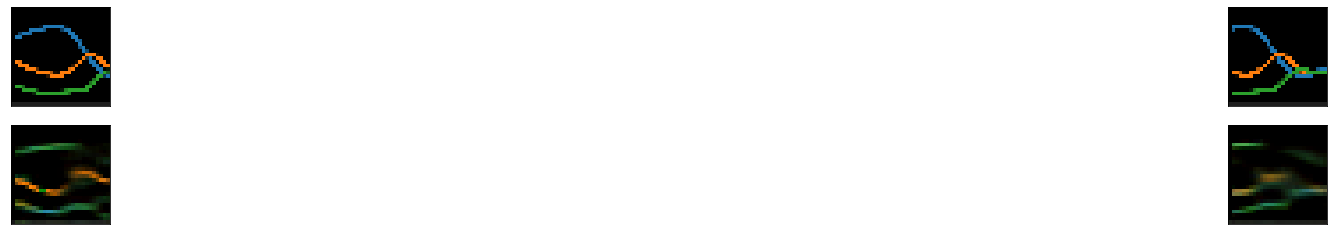

In [ ]:
#RGB images
#color lines
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name
# this loop is for read each image in this foder,directory_name is the foder name with images.
for filename in os.listdir(r'/content/pattern8/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/pattern8/" + filename
        img = cv2.imread(img_path)
        img = img[45:320,45:320] #cut white area in blackground
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
      
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
        #img_rgb = img_rgb.astype(np.float32)
        #img_rgb = img_rgb / 255.0

        #img = img
        array_of_img.append(img_rgb)
        #print(img)
        #print(array_of_img)

image_input = np.array(array_of_img)


P1 = image_input
P1T = image_input

# RGB nomilization
# load and resize images
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#normalise 
P1 = P1.astype('float32') / 255
P1T = P1T.astype('float32') / 255
P1 = np.reshape(P1, (len(P1), 28, 28, 3))  # adapt this if using `channels_first` image data format
P1T = np.reshape(P1T, (len(P1T), 28, 28, 3))  # adapt this if using `channels_first` image data format

decoded_imgs = autoencoder.predict(P1)

n = 2

plt.figure(figsize=(40, 4))
for i in range(n):
  # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow((P1[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display original

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow((decoded_imgs[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

clf_train = newmodel.predict(P1)
clf_test = newmodel.predict(P1T)


n = 2
#len(X_test)
for i in range(0,n,1):
    #print(clf_test[1,:])
    R = np.sum(clf_test[i,:])
    print(R)

for i in range(0,n,1):
  x = clf_train[0,:] 
  y = clf_test[1,:]
  print(x)
  print(y)
  d=np.sqrt(np.sum(np.square(x-y)))
  print(d)


In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers
base_model = tf.keras.models.load_model('/content/encoder.h5')
base_model.load_weights('encoder.h5')

X = base_model.output
predictions = Dense(64, activation='softmax')(X)
newmodel = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.trainable = False
newmodel.summary()

print(predictions)

#test pattern1
clf_train = newmodel.predict(X_train)
clf_test = newmodel.predict(X_test)

newmodel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy']) 
loss, acc = newmodel.evaluate(X_test,clf_test)
print("Loss:", loss)
print("Acc:", acc)
print("softmax output:", clf_test)

encoder_test = encoder.predict(X_test)
print("encoder output:", encoder_test)

from sklearn.decomposition import PCA
encoded_imgs_2D = PCA(n_components=2).fit_transform(clf_test)
plt.figure(figsize=(10, 10))
for label in range(10):
    encodings = encoded_imgs_2D[clf_train == clf_test[i]]
    plt.scatter(encodings[:, 0], encodings[:, 1], alpha=.5, clf_test = clf_test)
plt.legend()

history = newmodel.fit(X_train, X_train, epochs=100, batch_size=12, shuffle=True)
# plot loss
score = newmodel.evaluate(X_train, X_train, batch_size=12)

clf_test = newmodel.predict(pattern1_test)
#clf_test = np.reshape(clf_test, (len(clf_test), 64,1))  # adapt this if using `channels_first` image data format
print(clf_test)
encoder_test = encoder.predict(pattern1_test)
print(encoder_test)

##not work all 1
#Yresult_train_one_hot = to_categorical(clf_test)
#print(Yresult_train_one_hot, file=open("test2_1.txt", "a"))

n = 2

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((clf_test[i]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print(clf_test[i])
    

#model.fit(X_train,X_train,epochs=20,batch_size=12,validation_data=(X_test, X_test))

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers
base_model = tf.keras.models.load_model('/content/encoder.h5')
base_model.load_weights('encoder.h5')

X = base_model.output
predictions = Dense(64, activation='softmax')(X)
newmodel = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.trainable = False
newmodel.summary()

print(predictions)

#test pattern1
clf_train = newmodel.predict(X_train)
clf_test = newmodel.predict(X_test)

#opt = keras.optimizers.Adam(learning_rate=0.01) #10
newmodel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy']) 
history = newmodel.fit(X_train, clf_test, epochs=10, batch_size=12, shuffle=True, validation_data=(X_test,clf_test))

#encoder_test = encoder.predict(X_test)
#print(encoder_test)
figure(5)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
figure(6)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

loss, acc = newmodel.evaluate(X_test,clf_test)
print("Loss:", loss)
print("Acc:", acc)
print("softmax output:", clf_test)

encoder_test = encoder.predict(X_test)
print("encoder output:", encoder_test)

from sklearn.decomposition import PCA
encoded_imgs_2D = PCA(n_components=2).fit_transform(result)
plt.figure(figsize=(10, 10))
for label in range(10):
    encodings = encoded_imgs_2D[X_test == clf_test, :]
    plt.scatter(encodings[:, 0], encodings[:, 1], alpha=.5)
plt.legend()

history = newmodel.fit(X_train, X_train, epochs=100, batch_size=12, shuffle=True)
# plot loss
score = newmodel.evaluate(X_train, X_train, batch_size=12)

clf_test = newmodel.predict(pattern1_test)
#clf_test = np.reshape(clf_test, (len(clf_test), 64,1))  # adapt this if using `channels_first` image data format
print(clf_test)
encoder_test = encoder.predict(pattern1_test)
print(encoder_test)

##not work all 1
#Yresult_train_one_hot = to_categorical(clf_test)
#print(Yresult_train_one_hot, file=open("test2_1.txt", "a"))

n = 2

plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    #plt.imshow((result[1]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    #plt.imshow(X_test[i].reshape(28,28))
    plt.imshow((clf_test[i]).reshape(64,1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print(clf_test[i])
    

#model.fit(X_train,X_train,epochs=20,batch_size=12,validation_data=(X_test, X_test))

In [ ]:

n = 2
#len(X_test)
for i in range(0,n,1):
    #print(clf_test[1,:])
    R = np.sum(clf_test[i,:])
    G = np.sum(encoder_test[i,:])
    print(R)
    print(G)


1.0
353.38815
1.0000001
318.25046


In [ ]:
for i in range(0,n,1):
  x = clf_test[0,:] 
  y = clf_test[1,:]
  print(x)
  print(y)
  d=np.sqrt(np.sum(np.square(x-y)))
  print(d)

[1.03564972e-07 6.06693473e-10 6.78332162e-06 9.13948715e-01
 5.28872031e-13 9.99570537e-10 4.26896607e-09 1.63434224e-10
 9.67044707e-06 1.61765115e-06 5.33108280e-10 3.05878643e-06
 7.68008165e-18 7.42974362e-06 6.64745585e-07 7.84432108e-04
 2.49412633e-08 1.03848965e-08 1.09144896e-14 4.47946422e-13
 1.64785161e-14 1.30153821e-14 8.60116631e-11 3.34861325e-05
 2.66890061e-06 1.60857017e-08 3.49129692e-07 3.34279560e-13
 3.77669312e-10 4.52779192e-09 1.24270727e-09 2.19902031e-11
 8.23497251e-02 1.45502206e-08 9.84289894e-09 1.48540658e-09
 1.94936609e-10 6.85635836e-12 6.83303275e-11 9.89168125e-09
 8.69389670e-14 2.01816611e-14 3.07206958e-14 4.94054220e-08
 1.09497446e-11 1.56215962e-09 1.42606481e-13 2.84786196e-03
 1.72267003e-14 1.36373565e-13 2.80638596e-10 7.58091367e-10
 1.18486865e-08 3.25950032e-06 1.68346213e-13 4.25440492e-14
 2.33440663e-11 1.60336566e-12 8.34194380e-11 1.39631920e-15
 9.04934599e-11 1.40304579e-09 1.59493363e-10 2.58975383e-08]
[4.19618073e-06 3.75738

In [ ]:
##test measure


In [ ]:
#test pattern similar or not
#RGB
#color lines
import cv2
from google.colab.patches import cv2_imshow
import torchvision.transforms as transforms

image_w=28
image_h=28

array_of_img = [] # this if for store all of the image data
# this function is for read image,the input is directory name
# this loop is for read each image in this foder,directory_name is the foder name with images.
for filename in os.listdir(r'/content/pattern1/'):
        print(filename) #just for test
        #img is used to store the image data 
        img_path = "/content/pattern1/" + filename
        img = cv2.imread(img_path)
        img = img[45:320,45:320] #cut white area in blackground
        img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
      
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
        #img_rgb = img_rgb.astype(np.float32)
        #img_rgb = img_rgb / 255.0

        #img = img
        array_of_img.append(img_rgb)
        #print(img)
        #print(array_of_img)

image_input = np.array(array_of_img)


pattern1_train = image_input
pattern1_test = image_input

#normalise 
pattern1_train = pattern1_train.astype('float32') / 255
pattern1_test = pattern1_test.astype('float32') / 255
pattern1_train = np.reshape(pattern1_train, (len(pattern1_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
pattern1_test = np.reshape(pattern1_test, (len(pattern1_test), 28, 28, 3))  # adapt this if using `channels_first` image data format


ID002_filtered_4.png
ID002_filtered_3.png


In [ ]:
# Loads the weights

new_model = encoder(input_shape=(64,)) 
 
new_model.load_weights('encoder.h5')

encoder = tf.keras.models.load_model('/content/encoder.h5')
for layer in encoder.layers[0:11]:
    layer.trainable = False
# Check its architecture
encoder.summary()

num_classes = 64
# Define new model encoder -> Dense  64 neurons with soft max for classification 
input = tf.keras.Input(shape=(64,))  
#x_in = Input(shape=(10,), name="InputLayer")
#_ = encoder(input_img)
#10
print(encoder.get_layer(index=10))
out2 = Dense(num_classes, activation='softmax')(input)
new_model = Model(encoder.inputs, out2)

#check model layers
for i in range(len(new_model.layers)):
  print(autoencoder.get_layer(index=i).output) #0-23 10


for layer in encoder.layers : layer.trainable = False # Freeze the layer
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
new_model.summary()

new_model.fit(X_train, X_train, epochs=50,batch_size=12,shuffle=True,validation_data=(X_test, X_test))

print(out2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               1651

ValueError: ignored

In [ ]:
# Change the labels from categorical to one-hot encoding
from tensorflow.keras.utils import to_categorical 
from sklearn import metrics
import matplotlib.pyplot as plt

num_classes = 64
# Define new model encoder -> Dense  64 neurons with soft max for classification 
#input = Input(shape=(28, 28, 3))  
#x_in = Input(shape=(10,), name="InputLayer")
#_ = encoder(input_img)

out2 = Dense(num_classes, activation='softmax')(input)
newmodel = Model(encoder.inputs, out2)
for layer in encoder.layers : layer.trainable = False # Freeze the layer
newmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
newmodel.summary()
newmodel.fit(X_train, X_train, epochs=50,batch_size=12,shuffle=True,validation_data=(X_test, X_test))

print(out2)
Out2_one_hot = to_categorical(out2)
print(Out2_one_hot)

#len_mlist = result.shape[0]+1
#mlist = list(range(1,len_mlist))
#mlist1 = np.array(mlist)

X = Out2_one_hot.astype(int)
print(X)

confusion_matrix = metrics.confusion_matrix(X, X)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

newmodel = Model(encoder.output, out2)
#newmodel = Model(encoded, out2)

# check classification 
autoencoder.get_weights()[0][1]
newmodel.get_weights()[0][1]
for l1,l2 in zip(newmodel.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())

#for layer in full_model.layers[0:19]:
#    layer.trainable = False

newmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
newmodel.summary()


for layer in encoder.layers : layer.trainable = False # Freeze the layer


newmodel.fit(X_train, Yresult_train_one_hot,
      epochs=50,
      batch_size=256,
      shuffle=True,
      validation_data=(X_test, Yresult_train_one_hot))

scoreFor100 = newmodel2.evaluate(x_test100, y_test100, verbose=1) 

print("Accuracy with 10-labeled samples: ", scoreFor10[1])
print("Accuracy with 100-labeled samples: ", scoreFor100[1])

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()


ValueError: ignored

In [ ]:
# Change the labels from categorical to one-hot encoding
from tensorflow.keras.utils import to_categorical 
from sklearn import metrics
import matplotlib.pyplot as plt
#result_train = encoder.predict(X_train) #64
#result_test = encoder.predict(X_test)
# 34  5/11

Yresult_train_one_hot1 = to_categorical(result[5])
Yresult_train_one_hot2 = to_categorical(result[11]) 
print(Yresult_train_one_hot1, file=open("test2_1.txt", "a"))
#print(Yresult_train_one_hot2, file=open("test2_2.txt", "a"))
#print(Yresult_train_one_hot2)
#Yresult_test_one_hot = to_categorical(result_test)
#print("Hello stackoverflow!", file=open("output.txt", "a"))

# Display the change for category label using one-hot encoding
#print('Original label:', X_train.shape[0],X_train) #18179
#print('After conversion to one-hot:', Yresult_train_one_hot.shape[0],Yresult_train_one_hot)

num_classes = 64
# Define new model encoder -> Dense  64 neurons with soft max for classification 
out2 = Dense(num_classes, activation='softmax')(x)
newmodel = Model(encoder.input, out2)
for layer in encoder.layers : layer.trainable = False # Freeze the layer
newmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
newmodel.summary()
newmodel.fit(X_train, X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test, X_test))


print(out2)
Out2_one_hot = to_categorical(out2)
print(Out2_one_hot)

#len_mlist = result.shape[0]+1
#mlist = list(range(1,len_mlist))
#mlist1 = np.array(mlist)

X = Out2_one_hot.astype(int)
print(X)

confusion_matrix = metrics.confusion_matrix(X, X)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

newmodel = Model(encoder.output, out2)
#newmodel = Model(encoded, out2)

# check classification 
autoencoder.get_weights()[0][1]
newmodel.get_weights()[0][1]
for l1,l2 in zip(newmodel.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())

#for layer in full_model.layers[0:19]:
#    layer.trainable = False

newmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
newmodel.summary()


for layer in encoder.layers : layer.trainable = False # Freeze the layer


newmodel.fit(X_train, Yresult_train_one_hot,
      epochs=50,
      batch_size=256,
      shuffle=True,
      validation_data=(X_test, Yresult_train_one_hot))

scoreFor100 = newmodel2.evaluate(x_test100, y_test100, verbose=1) 

print("Accuracy with 10-labeled samples: ", scoreFor10[1])
print("Accuracy with 100-labeled samples: ", scoreFor100[1])

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
#@title  { form-width: "80px" }
#cnn + flatten
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Softmax
from keras.models import Model
from tensorflow.keras.utils import plot_model
for layer in encoder.layers : layer.trainable = False # Freeze the layer

# The encoding process
input_img = Input(shape=(28, 28, 3))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

x = Flatten()(x)  #32
#x = Dense(2*2*8)(x)  #32
x = Dense(4*4*8, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(4*4*8/2.0, activation='relu')(x)
x = BatchNormalization()(x)
#x = ReLU()(x)
#x = Dense(2*2*8/2.0)(x)  #32
#x = BatchNormalization()(x)
#x = ReLU()(x)
# bottleneck
n_bottleneck = 4*4*8/2.0
encoded = Dense(n_bottleneck, activation='relu')(x) #FC
#softmax
num_classes = 64
# Define new model encoder -> Dense  64 neurons with soft max for classification 
out2 = Dense(num_classes, activation='softmax')()
newmodel = Model(input_img, out2)
newmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
newmodel.summary()

newmodel.fit(X_train, X_train,
      epochs=50,
      batch_size=256,
      shuffle=True,
      validation_data=(X_test, X_test))

plot_model(newmodel, 'newmodel_no_compress.png', show_shapes=True)

TypeError: ignored

In [ ]:
encoded_input = Input(shape=(n_bottleneck,))
deco = autoencoder.layers[-3](encoded)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)
decoder = Model(encoded_input, deco)

# encode and decode some inputs
# note that we take them from the *test* set
add_decoded_imgs = decoder.predict(results)

n = 20  # how many photos to display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(add_decoded_imgs[i]* 255).astype(np.uint8)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# To lock the weights of the encoder on post-training
from tensorflow.keras.utils import to_categorical 
from keras.utils import to_categorical
for layer in encoder.layers : layer.trainable = False

num_classes = 64

from keras.utils import to_categorical
Y_train = to_categorical(encoded, num_classes)

encoded_train = tf.to_categorical(encoded, num_classes) # One-hot encode the labels
encoded_test = tf.to_categorical(encoded, num_classes) # One-hot encode the labels

# Define new model encoder -> Dense  10 neurons with soft max for classification 

out2 = Dense(num_classes, activation='softmax')(encoder.output)

# Fine tuning with 10-labeled samples
fine_tune_size = 10
x_train10 = X_train[:fine_tune_size]
x_test10 = X_test[:fine_tune_size]
y_train10 = encoded_train[:fine_tune_size]
y_test10 = encoded_test[:fine_tune_size]

newmodel = Model(encoder.input, out2)
newmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

newmodel.fit(x_train10, y_train10,
      epochs=50,
      batch_size=256,
      shuffle=True,
      validation_data=(x_test10, y_test10))
scoreFor10 = newmodel.evaluate(x_test10, y_test10, verbose=1)   

# Fine tuning with 100-labeled samples
fine_tune_size = 100
x_train100 = X_train[:fine_tune_size]
x_test100 = X_test[:fine_tune_size]
y_train100 = encoded_train[:fine_tune_size]
y_test100 = encoded_test[:fine_tune_size]

newmodel2 = Model(encoder.input, out2)
newmodel2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
newmodel2.fit(x_train100, y_train100,
      epochs=50,
      batch_size=256,
      shuffle=True,
      validation_data=(x_test100, y_test100))

scoreFor100 = newmodel2.evaluate(x_test100, y_test100, verbose=1) 

print("Accuracy with 10-labeled samples: ", scoreFor10[1])
print("Accuracy with 100-labeled samples: ", scoreFor100[1])

TypeError: ignored

In [ ]:
#@title
# noise
# test decode results and original image
decoded_imgs = autoencoder.predict(X_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    #plt.imshow(X_test[i].reshape(128, 128,3))
    plt.imshow((X_test[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + 1+n)
    #plt.imshow(X_test[i].reshape(128, 128,3))
    plt.imshow((noisy_train_data[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow((decoded_imgs[i] * 255).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# test decode results and original image
decoded_imgs = autoencoder.predict(X_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28,28))
    #plt.imshow((X_test[i]* 255 ).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    #plt.imshow((decoded_imgs[i]* 255).astype(np.uint8))
    plt.imshow(decoded_imgs[i].reshape(28, 28)*255)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Plot clustering results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

result = encoder.predict(X_test)
#result1 = np.transpose(result)
#print(result1.size)
len_mlist = result.shape[0]+1
mlist = list(range(1,len_mlist))
mlist1 = np.array(mlist)

x = []
y = []
z = []
x = result[:,0]
y = result[:,1]
z = result[:,2]
#gender_labels = np.random.choice([0, 1], 35)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
#ax.scatter(x,y,z,c=mlist,cmap=plt.cm.Blues,edgecolor='none',s=20)
#ax1.plot(x1,y1,z1)

plt.show()
#for i in range(len(y)):

    #plt.text(x[i]*1.01, y[i]*1.01, z[i]*1.01, s = '%d' % (int(i)), fontsize=10, fontstretch = 'condensed', color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=15)
#plt.savefig('result.png')
#plt.show()

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul 12 15:55:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#@title
# come back and test sequences
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

back_array =[]

pickup_seqs = [94,122,114]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.view_init(32, -32)
    
ax2 = fig.add_subplot(122, projection='3d')

for i in range(0, len(pickup_seqs), 1): 

  back_array = np.array(output_all_data[pickup_seqs[i]])
  x1 = back_array[:,[0]].flatten()
  y1 = back_array[:,[1]].flatten()
  z1 = back_array[:,[2]].flatten()
  x2 = back_array[:,[3]].flatten()
  y2 = back_array[:,[4]].flatten()
  z2 = back_array[:,[5]].flatten()
  
  ax1.plot(x1,y1,z1)
  ax2.plot(x2,y2,z2)


plt.show()

In [ ]:
#@title
# change the dimensions
output_all_data = np.array(output_all_data)
output_all_data = np.expand_dims(output_all_data, axis=3)
print("output shape:", output_all_data.shape)

In [ ]:
#@title
# CNN for images
from tensorflow.keras.models import Sequential

num_filters = 8
filter_size = 28
pool_size = 2
Cnn_outsize = 8


image_input = image_input.reshape(image_input.shape[0], image_w, image_h, 3)


# build CNN
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(image_w, image_h, 3)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(Cnn_outsize, activation='linear'),
])

# set initial values of CNN
model.compile(
  'adam',
)

#run CNN to convert images to vectors
output_cnn = model.predict(image_input[:])
print(output_cnn)

In [ ]:
#@title
#Check CNN
A = [0, 1]
B = [1003]
#C= []

AResult = model.predict(image_input[A])
print(AResult)
BResult = model.predict(image_input[B])
print(BResult)
#CResult = model.predict(image_input[C])

In [ ]:
#@title
# convert sequences to vectors for autoencoder
from tensorflow.keras.models import Sequential

num_filters = 4
filter_size = 3
pool_size = 2
Cnn_outsize = 8

# build CNN
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(l_Sequence, 6, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(Cnn_outsize, activation='linear'),
])

# set initial values of CNN
model.compile(
  'adam',
)

#run CNN to convert sequences to vectors
print(output_all_data[0].shape)
output_cnn = model.predict(output_all_data[:])
print(output_cnn)

In [ ]:
#@title
# split into train test sets;
# For unlabeled data, split into train test sets is not necessary
#X_train, X_test = train_test_split(all_data, test_size=0.33, random_state=1)
X_train = output_cnn
X_test = output_cnn
print(X_train)


## load encoder.h5 model from file
#load_encoder = load_model('encoder.h5')
## encode the train data
#X_train_encode = load_encoder.predict(X_train)
## encode the test data
#result = load_encoder.predict(X_test)



In [ ]:
#@title
# Make a network model next to CNN
# autoencoder_model
# define encoder

n_inputs=Cnn_outsize

visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 2
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

#plot progress results
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)


In [ ]:
#@title
# Make a network model next to CNN
# autoencoder_model
# define encoder

n_inputs=Cnn_outsize

visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/2.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs/4.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 2.0
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs/4.0)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs/2.0)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 3
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

#plot progress results
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
#@title
# train model and save it
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=256, batch_size=12, verbose=2, validation_data=(X_test,X_test))
# plot loss
figure(4)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
#@title
# Plot clustering results
result = encoder.predict(X_test)
result1 = np.transpose(result)
len_mlist = output_all_data.shape[0]+1
mlist = list(range(1,len_mlist))
mlist1 = np.array(mlist)
x = []
y = []
x = result1[0]
y = result1[1]
print(x.size)
print(y.size)
figure(5)
plt.plot(x)
plt.savefig('x.png') #check x coloum data
figure(6)
plt.plot(y)
plt.savefig('y.png') ##check y coloum data

fig=plt.figure(figsize=(10,10))
plt.scatter(x,y,c=mlist,cmap=plt.cm.Blues,edgecolor='none',s=20)
for i in range(len(y)):
    plt.text(x[i]*1.01, y[i]*1.01, mlist1[i], fontsize=10, fontstretch = 'condensed', color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=15)
plt.savefig('result.png')
plt.show()

In [ ]:
#@title
# Make a network model
# autoencoder_model
# define encoder
visible = Input(shape=(n_inputs,12,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/2.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs/4.0)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(2.0)
bottleneck = Dense(n_bottleneck)(e)
## test bottleneck
#print(bottleneck)
#print(bottleneck.shape[0])
#print(n_bottleneck)
#print(e)
# define decoder, level 1
d = Dense(n_inputs/4.0)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs/2.0)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 3
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

#plot progress results
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)